<a href="https://colab.research.google.com/github/santausd/USD-AAI-530-A1-Assignment3.1/blob/main/lab_and_assignment_4_1_notebookv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential Privacy Simulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure inline plotting for Jupyter Notebook
%matplotlib inline

# <span style="color:red;">---------------------------------------Lab Portion----------------------------------------</span>

## Generate Mock Census Dataset

In [2]:
# Set random seed for reproducibility
np.random.seed(531)

# Define population size
population_size = 10000

# Define ethnicity categories and corresponding proportions (mock American demographics)
ethnicities = ['White', 'Hispanic', 'Black', 'Asian', 'Native American', 'Other']
proportions_ethnicity = [0.60, 0.18, 0.12, 0.06, 0.01, 0.03]

# Define age groups and proportions (mock age distribution)
age_groups = ['0-18', '19-35', '36-60', '60+']
age_proportions = [0.25, 0.35, 0.25, 0.15]

# Define income levels and corresponding proportions
income_levels = ['Low', 'Middle', 'High']
income_proportions = [0.40, 0.40, 0.20]

# Define urban vs rural distribution
locations = ['Urban', 'Rural']
location_proportions = [0.70, 0.30]

# Define education levels and their proportions
education_levels = ['No High School', 'High School', 'College', 'Graduate']
education_proportions = [0.15, 0.35, 0.35, 0.15]

# Generate the dataset using random choices from the defined proportions
df = pd.DataFrame({
    'Ethnicity': np.random.choice(ethnicities, size=population_size, p=proportions_ethnicity),
    'Age': np.random.choice(age_groups, size=population_size, p=age_proportions),
    'Income': np.random.choice(income_levels, size=population_size, p=income_proportions),
    'Location': np.random.choice(locations, size=population_size, p=location_proportions),
    'Education': np.random.choice(education_levels, size=population_size, p=education_proportions)
})

# Display the first 10 rows
print("Sample of Mock Dataset:")
print(df.head(10))

# Calculate and display frequency count for all ethnicities
ethnicity_counts = df['Ethnicity'].value_counts()
print("\nFrequency count for all ethnicities in the original dataset:")
print(ethnicity_counts)


Sample of Mock Dataset:
  Ethnicity    Age  Income Location    Education
0  Hispanic  19-35  Middle    Urban      College
1     White  19-35  Middle    Urban      College
2     Asian  36-60  Middle    Urban  High School
3  Hispanic  19-35  Middle    Urban  High School
4     Other  36-60     Low    Urban     Graduate
5     White  36-60     Low    Urban      College
6     White  36-60  Middle    Urban  High School
7     White   0-18  Middle    Urban     Graduate
8     White    60+     Low    Urban      College
9     White  36-60  Middle    Urban  High School

Frequency count for all ethnicities in the original dataset:
Ethnicity
White              5991
Hispanic           1780
Black              1217
Asian               594
Other               307
Native American     111
Name: count, dtype: int64


## Apply the Laplace Mechanism to Add Noise to Ethnicity Counts

In [3]:
np.random.seed(531)

# Define Laplace mechanism function to add differential privacy noise to ethnicity counts
def apply_laplace_mechanism(counts, epsilon, sensitivity=1):
    noisy_counts = {}
    for key, value in counts.items():
        noise = np.random.laplace(loc=0, scale=sensitivity/epsilon)
        noisy_counts[key] = max(0, value + noise)  # Ensure counts don't go negative
    return noisy_counts

# set privacy budget to inject noise
epsilon_values = [0.1, 0.5, 1.0]

# Define a function to calculate percent relative error
def pct_error(orig, priv):
    if orig == 0:
        return 0  # To avoid division by zero if original count is zero
    return (priv - orig) / orig * 100.0

# Calculate and print change in representation for each ethnicity for each epsilon value

 # NOTE: To calculate the impact of representation on other variables (e.g., Income, Location),
        # you can switch out the 'ethnicity_counts' variable with counts for the desired category.
        # For example, replace 'ethnicity_counts' with 'income_counts_native_american' to focus on income levels.
for epsilon in epsilon_values:
    noisy_ethnicity_counts = apply_laplace_mechanism(ethnicity_counts.to_dict(), epsilon)

    print(f"\nChange in Representation with Epsilon = {epsilon}:")
    for ethnicity in ethnicity_counts.index:
        original_count = ethnicity_counts[ethnicity]
        noisy_count = noisy_ethnicity_counts[ethnicity]

        # Calculate change in representation
        if original_count > 0:
            change_in_representation = ((noisy_count - original_count) / original_count) * 100
        else:
            change_in_representation = 0  #  handle cases where original_count might be 0

        # Print
        print(f"Ethnicity: {ethnicity}")
        print(f" - Original Count: {original_count}")
        print(f" - Noisy Count: {noisy_count}")
        print(f" - Change in Representation (%): {change_in_representation:.2f}%\n")




Change in Representation with Epsilon = 0.1:
Ethnicity: White
 - Original Count: 5991
 - Noisy Count: 5995.774165128831
 - Change in Representation (%): 0.08%

Ethnicity: Hispanic
 - Original Count: 1780
 - Noisy Count: 1776.5735692207645
 - Change in Representation (%): -0.19%

Ethnicity: Black
 - Original Count: 1217
 - Noisy Count: 1240.0142737650235
 - Change in Representation (%): 1.89%

Ethnicity: Asian
 - Original Count: 594
 - Noisy Count: 597.3697063449988
 - Change in Representation (%): 0.57%

Ethnicity: Other
 - Original Count: 307
 - Noisy Count: 339.0061513542296
 - Change in Representation (%): 10.43%

Ethnicity: Native American
 - Original Count: 111
 - Noisy Count: 101.43594013066212
 - Change in Representation (%): -8.62%


Change in Representation with Epsilon = 0.5:
Ethnicity: White
 - Original Count: 5991
 - Noisy Count: 5991.247822371485
 - Change in Representation (%): 0.00%

Ethnicity: Hispanic
 - Original Count: 1780
 - Noisy Count: 1779.70832201274
 - Change 

## Generate Relative Error Visualization

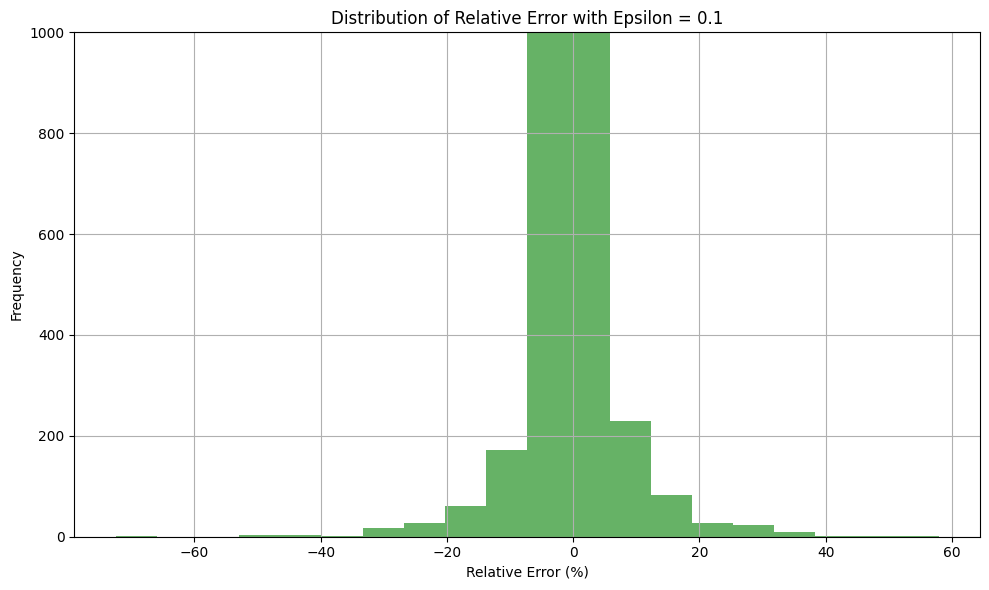

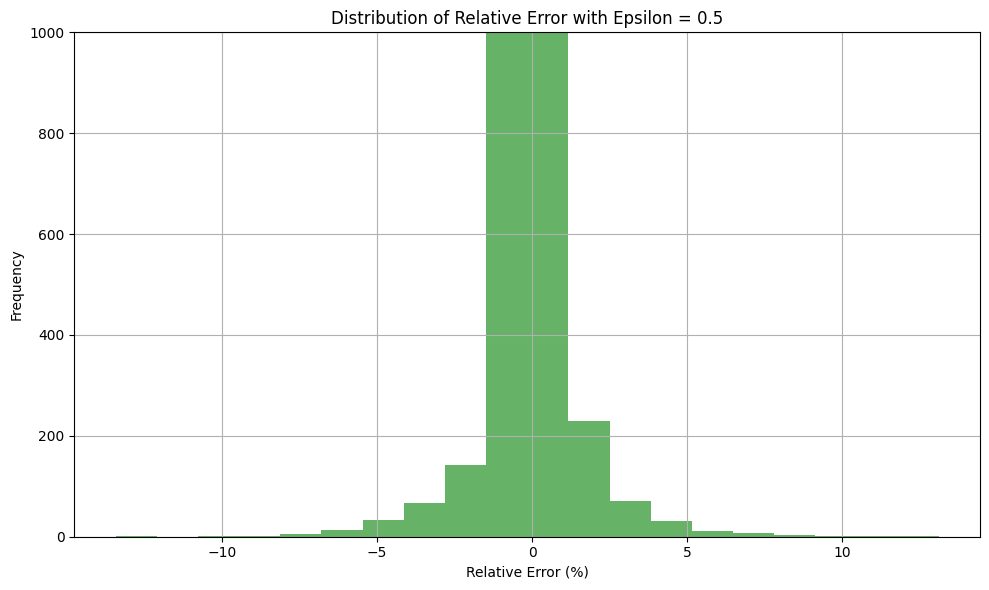

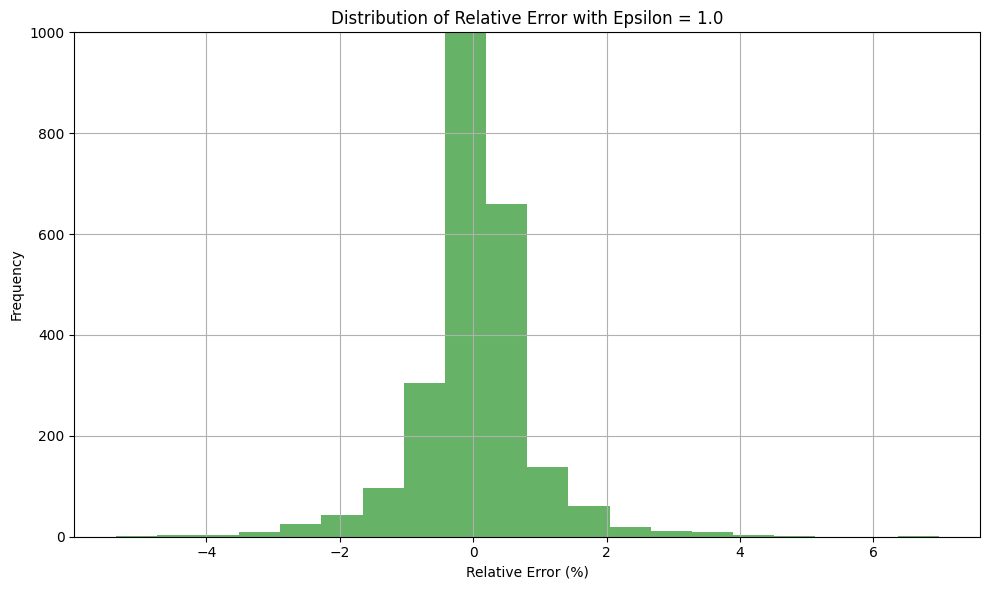

In [4]:
# take a look at overall relative error
def graph_relative_error_histogram(original_counts, epsilon_values, num_samples=1000):
    for epsilon in epsilon_values:
        relative_errors = []

        # Generate differentially private answers and calculate relative errors
        for _ in range(num_samples):
            noisy_counts = apply_laplace_mechanism(original_counts.to_dict(), epsilon)
            for eth in original_counts.index:       # replace "eth" with "income_level" or desired variable
                original_count = original_counts[eth] # replace "eth" with "income_level" or desired variable
                noisy_count = noisy_counts[eth] # replace "eth" with "income_level" or desired variable

                # Calculate relative error
                relative_error = pct_error(original_count, noisy_count)
                relative_errors.append(relative_error)

        # Plot histogram of relative errors
        plt.figure(figsize=(10, 6))
        plt.hist(relative_errors, bins=20, alpha=0.6, color='green')
        plt.xlabel('Relative Error (%)')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Relative Error with Epsilon = {epsilon}')
        plt.grid(True)
        plt.ylim(0, 1000)
        plt.tight_layout()
        plt.show()

# Visualize the relative error for the ethnicity counts with different epsilon values
graph_relative_error_histogram(ethnicity_counts, epsilon_values)

# <span style="color:red;">----------------------------------------END LAB----------------------------------------</span>

# <span style="color:blue">Assignment Introduction</span>

In this assignment, you will extend the concepts demonstrated in the lab portion to analyze income levels within a specific ethnic group: Native Americans. The goal is to understand how applying differential privacy impacts our analysis when focusing on a smaller, often underrepresented population group.

Specifically, you will explore how the Laplace mechanism affects the <b>income level counts</b> for Native Americans. Education and other government funding often depend on accurate data about income levels, and differential privacy can introduce noise that may distort these figures. Your task will be to determine how varying the privacy budget (epsilon) changes the accuracy of these counts and to reflect on the broader implications of these changes, particularly when allocating resources to underrepresented groups.

## Step 1: Calculate Original Counts for Income Levels


In [7]:
# Filter dataset for Native American subgroup
native_american_data = df[df['Ethnicity'] == 'Native American']

# Get original income counts for Native Americans
income_counts_native_american = native_american_data['Income'].value_counts()

# Display original income counts (Low, MIddle, & High) for Native Americans
print("\nIncome Level Counts for Native Americans (Original Data):")
for income_level, count in income_counts_native_american.items():
    print(f"{income_level}: {count}")



Income Level Counts for Native Americans (Original Data):
Low: 45
Middle: 39
High: 27


## <span style="color:blue">Step 2:</span> Apply Laplace Mechanism to Add Noise, Try (at least) Two Different Epsilon Values

<span style="color:blue">Instructions:</span>

<b>1. Apply Laplace Mechanism to Add Noise:</b>
Use the apply_laplace_mechanism function from the lab to add noise to the income level counts of the Native American subgroup.
Calculate the noisy counts for each of the income levels (Low, Middle, High) and observe how the Laplace mechanism affects these counts.

<b>2. Try at Least Two Different Epsilon Values:</b>
Select at least two different values for epsilon (e.g., epsilon = 0.1 and epsilon = 1.0).
Epsilon is a privacy budget parameter. A smaller epsilon value provides stronger privacy guarantees but more noise, whereas a larger epsilon value provides weaker privacy guarantees but more accuracy.
For each epsilon value, add Laplace noise to the income level counts and record the noisy counts.

<b>3. Analyze the Impact of Noise:</b>
Calculate the percent relative error for each income level for each epsilon value.
Reflect on the effects of the noise injected for each epsilon value in the "Observation and Reflection" section. How does changing epsilon affect the representation and accuracy of the income level counts for the Native American subgroup?

In [8]:
np.random.seed(531)
# Define Laplace mechanism function to add differential privacy noise to counts


In [11]:
epsilon_values =  [0.1, 0.5, 1.0]
for cur_epsilon in epsilon_values:
    noisy_income_counts_native_american = apply_laplace_mechanism(income_counts_native_american.to_dict(), epsilon)

    print(f"\nChange in Representation with Epsilon = {cur_epsilon}:")
    for cur_income in income_counts_native_american.index:
        original_count = income_counts_native_american[cur_income]
        noisy_count = noisy_income_counts_native_american[cur_income]

        # Calculate change in representation
        if original_count > 0:
            change_in_representation = ((noisy_count - original_count) / original_count) * 100
        else:
            change_in_representation = 0  #  handle cases where original_count might be 0

        # Print
        print(f"Current Income: {cur_income}")
        print(f" - Original Count: {original_count}")
        print(f" - Noisy Count: {noisy_count}")
        print(f" - Change in Representation (%): {change_in_representation:.2f}%\n")



Change in Representation with Epsilon = 0.1:
Current Income: Low
 - Original Count: 45
 - Noisy Count: 45.14958763383452
 - Change in Representation (%): 0.33%

Current Income: Middle
 - Original Count: 39
 - Noisy Count: 40.190248877970696
 - Change in Representation (%): 3.05%

Current Income: High
 - Original Count: 27
 - Noisy Count: 26.886903729911587
 - Change in Representation (%): -0.42%


Change in Representation with Epsilon = 0.5:
Current Income: Low
 - Original Count: 45
 - Noisy Count: 45.15676739040361
 - Change in Representation (%): 0.35%

Current Income: Middle
 - Original Count: 39
 - Noisy Count: 38.54786243102836
 - Change in Representation (%): -1.16%

Current Income: High
 - Original Count: 27
 - Noisy Count: 28.767264185991465
 - Change in Representation (%): 6.55%


Change in Representation with Epsilon = 1.0:
Current Income: Low
 - Original Count: 45
 - Noisy Count: 45.054774079218866
 - Change in Representation (%): 0.12%

Current Income: Middle
 - Original C

In [ ]:
np.random.seed(531)

# Hint- reference code from the lab (above)

# Define Laplace mechanism function to add differential privacy noise to counts


# Set privacy budget to inject noise
epsilon_values = []  # <--Choose two different epsilon values

# Define a function to calculate percent relative error (if you are interested!)


# Calculate and print change in representation for each income level for each epsilon value




        # Print
        print(f"Income Level: {income_level}")
        print(f" - Original Count: {original_count}")
        print(f" - Noisy Count: {noisy_count}")
        print(f" - Change in Representation (%): {change_in_representation:.2f}%\n")

## <span style="color:blue">Step 3:</span> Generate Relative Error Histogram Visualization for Native Americans

<span style="color:blue">Instructions:</span>

Create histograms to visualize the distribution of relative errors for the income level counts of Native Americans for each value of epsilon.

<b>1.Generate 1000 differentially private samples</b> of income level counts and calculate the relative error for each one.

<b>2.Label your visualizations</b> to clearly indicate the epsilon value used.


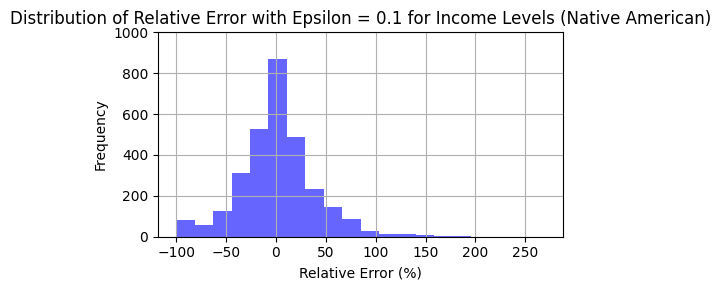

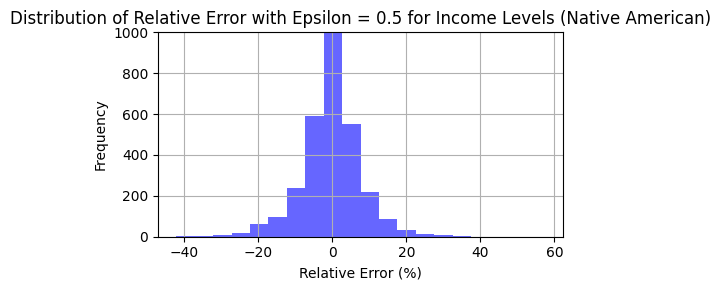

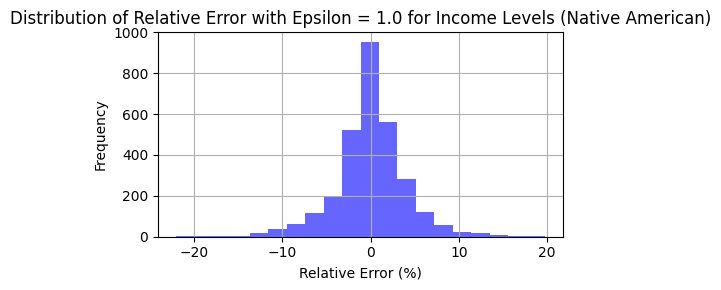

In [16]:
# Visualize the distribution of relative errors using histogram
def graph_relative_error_histogram(original_counts, epsilon_values, num_samples=1000):
    for epsilon in epsilon_values:
        relative_errors = []

        # Generate differentially private answers and calculate relative errors

        for _ in range(num_samples):
          noisy_counts = apply_laplace_mechanism(original_counts.to_dict(), epsilon)

          for income_level in original_counts.index:
                original_count = income_counts_native_american[income_level]
                noisy_count = noisy_counts[income_level]
                # Calculate relative error

                relative_error = pct_error(original_count, noisy_count)
                relative_errors.append(relative_error)

        # Plot histogram of relative errors
        plt.figure(figsize=(5, 3))
        plt.hist(relative_errors, bins=20, alpha=0.6, color='blue')
        plt.xlabel('Relative Error (%)')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of Relative Error with Epsilon = {epsilon} for Income Levels (Native American)')
        plt.grid(True)
        plt.ylim(0, 1000)
        plt.tight_layout()
        plt.show()

# Visualize the relative error for the income counts with different epsilon values
graph_relative_error_histogram(income_counts_native_american, epsilon_values)

## <span style="color:blue">Step 4: </span>Observation and Reflection
 (to be answered in 4.1 Exercsise document)

1. <b>Briefly describe your findings. How does changing the value of epsilon affect the relative error?</b>

This test is carried out with three epsilon value. Here is the finding.

1. Higher epsilon (1.0) value : It means lesser noise is added to the dataset ie noisy counts are closer to the original counts. Hence the data provide higher accuracy, lesser relative error (-20% to 15%) so weaker privacy protection.

2. Lesser epsilon (0.1) value: It means more noise is added to the dataset providing higher privacy protection by lesser accuracy. The relative error is -100% to ~160%.

3. Medium epsilon(0.5) value in between 0.1 and 1.0 : It will more noise to the dataset than epsilon value of 1.0 but less noise to than epsilon value of 0.1. It provides higher privacy protection of data compared to the dataset with epsilon value of 1.0 but less privacy protection of data compared to the epsilon value of 0.1. The relative error identified is ~25% to 40%.

There is a trade off between privacy protection and accuracy. With lesser epsilon value, we can introduce more noise in the database which creates higher privacy protection but lesser accuracy and vice-verse.





2. <b>Is there an epsilon value that produces results useful while still providing privacy protection? Explain your reasoning.</b>

Based on the above findings, epsilon value (0.5) provides a sufficient level of privacy protection along with reasonable accuracy. The relative error introduced with epsilon value(0.5) is moderate. Hence, it allows meaningful analysis of income level trends and disparities within the Native American subgroup.

3. <b>Discuss how the trade-offs between privacy and data utility in differential privacy might impact smaller communities in a dataset. How might the added noise impact decision-making, especially in the context of census data?</b>

Differential privacy introduces noise to protect individual privacy. However, this noise can disaproportionately affect smaller communities due to lesser representation.

Lesser epsilon value: It adds more noises in smaller groups compared to the larger group. Hence, there is a chance of obscuring meaningful trend present in the original dataset for the smaller communities. It can change any disparities as well across communities as well.

